# Лабораторная работа No 5. 
### Обработка результатов эксперимента.

### Задание 1.
$$ Z(t)= At^{4}+Ct^{2}+K$$

|t|1   |1.14|1.29|1.43 |1.57 |1.71 |1.86|1.92|2   |
|-|----|----|----|-----|-----|-----|----|----|----|
|Z|6.2 |7.2 |9.6 |12.5 |17.1 |22.2 |28.3|35.3|36.5|

Метод наименьших квадратов (МНК) - это статистический метод, используемый для нахождения наилучшей прямой линии или кривой, которая описывает набор данных. МНК минимизирует сумму квадратов расстояний от точек данных до линии или кривой. Этот метод часто используется в регрессионном анализе для подбора модели к данным.

Линия регрессии - это линия, которая описывает взаимосвязь между двумя переменными. Она показывает, как одна переменная изменяется в зависимости от другой. Линия регрессии может быть использована для прогнозирования значений одной переменной на основе значений другой переменной.

Коэффициент корреляции - это мера линейной связи между двумя переменными. Он принимает значения от -1 до +1, где 0 означает отсутствие связи, а ±1 означает полную прямую или обратную связь соответственно.Коэффициент регрессии показывает, насколько сильно одна переменная влияет на другую. Он рассчитывается как отношение изменения одной переменной к изменению другой переменной.

Суммарная квадратичная ошибка - это сумма квадратов отклонений точек данных от модели. Она используется для оценки качества модели и выбора наилучшей модели.

Средняя ошибка - это среднее отклонение точек данных от модели.

Относительная ошибка - это отношение средней ошибки к среднему значению данных.

Коэффициент A: 2.0233433896906803
Коэффициент C: 0.5691065530021087
Коэффициент K: 3.2316864324171104
Коэффициент корреляции (R^2): 0.9903886339850151
Суммарная квадратичная ошибка: 10.674981136794782
Средняя ошибка: 0.7168912197204437
Относительная ошибка: 0.03684763550818956


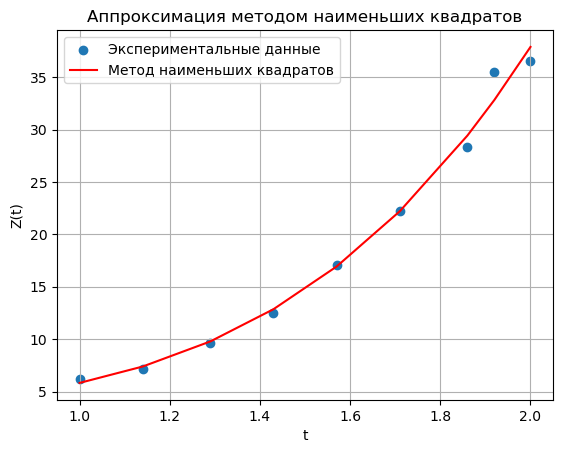

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd


data = {
    't': [1, 1.14, 1.29, 1.43, 1.57, 1.71, 1.86, 1.92, 2],
    'Z': [6.2, 7.2, 9.6, 12.5, 17.1, 22.2, 28.3, 35.5, 36.5]
}

# Создаем DataFrame
df = pd.DataFrame(data)

# Сохраняем DataFrame в файл CSV
csv_file = 'data.csv'  # Путь к файлу
df.to_csv(csv_file, index=False)  # номера строк не сохраняем

# Загрузка данных из файла CSV
dataframe = pd.read_csv('data.csv')
t_data = dataframe['t'].to_numpy()
Z_data = dataframe['Z'].to_numpy()

# Функция аппроксимации
def model(t, A, C, K):
    return A * t**4 + C * t**2 + K

# Расчёт метода наименьших квадратов
params, covariance = curve_fit(model, t_data, Z_data)

# Полученные коэффициенты A, B, D
A, C, K = params

# Вычисление значений G(s) по полученной модели
Z_model = model(t_data, A, C, K)

# Расчет коэффициента корреляции
correlation_matrix = np.corrcoef(Z_data, Z_model)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

# Расчет суммарной квадратичной ошибки
sq_error = np.sum((Z_data - Z_model) ** 2)

# Расчет средней и относительной ошибки
mean_error = np.mean(np.abs(Z_data - Z_model))
relative_error = mean_error / np.mean(Z_data)

# Вывод результатов
print(f"Коэффициент A: {A}")
print(f"Коэффициент C: {C}")
print(f"Коэффициент K: {K}")
print(f"Коэффициент корреляции (R^2): {r_squared}")
print(f"Суммарная квадратичная ошибка: {sq_error}")
print(f"Средняя ошибка: {mean_error}")
print(f"Относительная ошибка: {relative_error}")

# Визуализация
plt.scatter(t_data, Z_data, label='Экспериментальные данные')
plt.plot(t_data, Z_model, label='Метод наименьших квадратов', color='red')
plt.title('Аппроксимация методом наименьших квадратов')
plt.xlabel('t')
plt.ylabel('Z(t)')
plt.legend()
plt.grid(True)
plt.show()

### Задание 2.
Интерполяционный полином Лагранжа

Интерполяционный полином Лагранжа также используется для аппроксимации функций и строится на основе набора точек данных. Он назван в честь французского математика Жозефа Лагранжа.

Полином Лагранжа строится следующим образом:

Выбираются n+1 точек (xi, yi), где i = 0…n, и строится полином степени не выше n.
Для каждой точки (xi, yi) строится полином Li(x), который проходит через эту точку и имеет вид Li(x) = (x - x0)…(x - xi-1)(x - xi+1)…(x - xn).
Затем строится интерполяционный полином как сумма всех Li(x): P(x) = ∑ Li(x) yi.
Этот метод позволяет получить полином, который точно проходит через все заданные точки, но может быть менее эффективным, чем метод Ньютона, если функция имеет сложную форму.

Интерполяционный полином Лагранжа
[1.3032225517429192, 1.4019489482570804, 1.455010962091503]


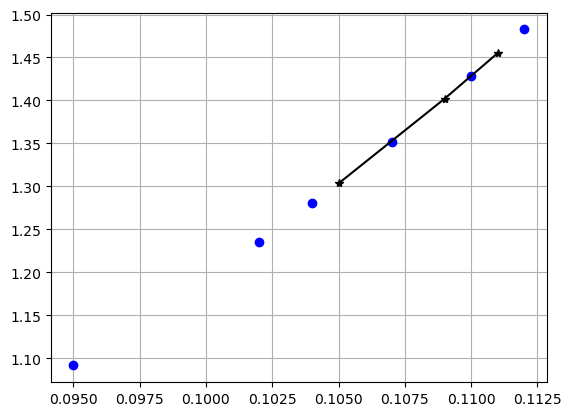

In [3]:
import math
import matplotlib.pyplot as plt
import numpy as np
n=6
x=[0.095,0.102,0.104,0.107,0.110,0.112]
y=[1.09131,1.23490,1.27994,1.35142,1.42815,1.48256]
x1=[0.105,0.109,0.111]
y1=[0,0,0]
print('Интерполяционный полином Лагранжа')
for k in range(3):
    for i in range(n):
        p=1
        for j in range(n):
            if i!=j:
                p=p*((x1[k]-x[j])/(x[i]-x[j]))
        y1[k]=y1[k]+y[i]*p
print(y1)
plt.figure()
plt.plot(x, y,'ob')
plt.plot(x1, y1,marker='*',color='black')
plt.grid(True)
plt.show()

Интерполяционный полином Ньютона

Интерполяционный полином Ньютона - это специальный вид многочлена, который используется для аппроксимации функций на основе заданных точек данных. Этот метод назван в честь Исаака Ньютона, хотя впервые он был описан в работах Блеза Паскаля.

Интерполяционный полином Ньютона строится следующим образом:

Сначала выбирается число n, которое определяет степень полинома. Обычно n выбирается так, чтобы полином проходил через все заданные точки данных.
Затем выбираются n+1 точек (x0, y0), (x1, y1), …, (xn, yn), где xi - это значения аргумента, а yi - соответствующие значения функции в этих точках.
Далее строится интерполяционный полином степени n, который проходит через все эти точки. Он имеет вид: P(x) = a0 + a1(x - x0) + a2(x - x0)(x - x1) + … + an(x - x0)…(x - xn-1).
Коэффициенты an находятся из системы уравнений: P(xi) = yi для i = 0…n.

[1.3032225517429195, 1.4019489482570806, 1.4550109620915033]


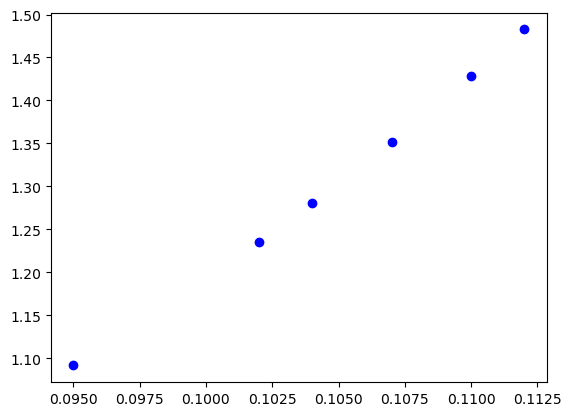

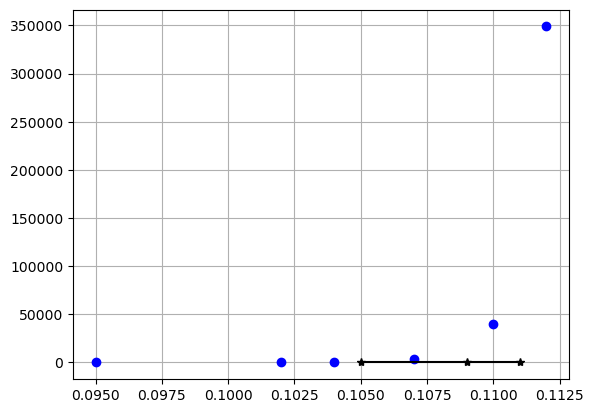

In [4]:
import math
import matplotlib.pyplot as plt
import numpy as np
n=6
x=[0.095,0.102,0.104,0.107,0.110,0.112]
y=[1.09131,1.23490,1.27994,1.35142,1.42815,1.48256]
plt.plot(x,y,'ob')
x1=[0.105,0.109,0.111]
y1=[0,0,0]
a=y
for j in range(1,n):
    for i in range(j,n):
        a[i]=(a[i]-a[j-1])/(x[i]-x[j-1])
for k in range(3):
    y1[k]=a[n-1]
    for i in range(n-2,-1,-1):
        y1[k]=a[i]+(x1[k]-x[i])*y1[k]
print(y1)
plt.figure()
plt.plot(x,y,'ob')
plt.plot(x1, y1,marker='*',color='black')
plt.grid(True)
plt.show()

Канонический полином

Канонический многочлен (или канонический полином) - это многочлен, который имеет вид P(x) = x^n + a_{n-1}x^{n-1} + … + a_1x + a_0, где a_i - коэффициенты многочлена.

Канонический полином используется для представления многочленов в виде суммы степеней переменной x. Это позволяет упростить некоторые операции над многочленами, такие как сложение, вычитание и умножение.

Также канонический полином может быть использован для представления функций, которые можно аппроксимировать многочленами. В этом случае коэффициенты многочлена могут быть найдены с помощью различных методов аппроксимации, таких как метод наименьших квадратов или интерполяция.

[1.3032225484066915, 1.4019489446924904, 1.455010958411778]


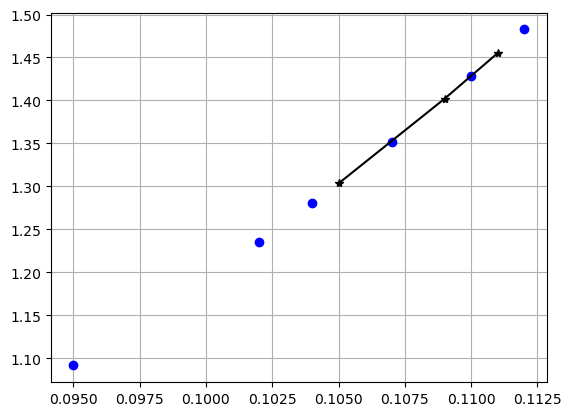

In [7]:
import math
import matplotlib.pyplot as plt
import numpy as np
def fun(A,r,i):
    #f=complex(0)
    #for i in range(0,i):
        #f=A[i]+f*r
    ii=0
    f=complex(0)
    while i>-1:
        f=f+A[ii]*r**i
        i=i-1
        ii=ii+1
    return f
n=6
x=[0.095,0.102,0.104,0.107,0.110,0.112]
y=[1.09131,1.23490,1.27994,1.35142,1.42815,1.48256]
x1=[0.105,0.109,0.111]
y1=[0,0,0]
A=[[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0]]
for i in range(n):
    for j in range(n):
        A[i][j]=x[i]**j
B=y
#решение слау через обратную матрицу
A_inv = np.linalg.inv(A)
X=[0]*len(A)
for i in range(len(A_inv)):
    s=0
    for j in range(len(A_inv)):
        s=s+(A_inv[i][j]*B[j])
    X[i]=s

for i in range(len(x1)):
    y1[i]=0
    for j in range(len(A)):
        y1[i]=y1[i]+(X[j]*x1[i]**j)
print(y1)
plt.figure()
plt.plot(x,y,'ob')
plt.plot(x1, y1,marker='*',color='black')
plt.grid(True)
plt.show()

Функция линейной интерполяции

Функция линейной интерполяции используется для нахождения значения функции между двумя известными точками. Она основана на предположении, что функция изменяется линейно между этими точками.

Формула линейной интерполяции имеет вид:

f(x) = f(x0) + (f(x1) - f(x0)) * (x - x0) / (x1 - x0),

где f(x0) и f(x1) - значения функции в известных точках x0 и x1, соответственно.

Эта формула позволяет найти приближенное значение функции f(x) для любого значения x между x0 и x1. Точность интерполяции зависит от того, насколько точно функция f(x) изменяется линейно между точками x0 и x1.

[1.2964385714285716, 1.4025733333333332, 1.4553549999999995]


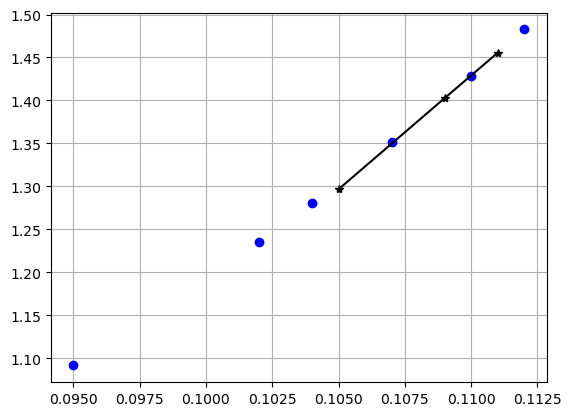

In [8]:
import matplotlib.pyplot as plt
n=6
x=[0.095,0.102,0.104,0.107,0.110,0.112]
y=[1.09131,1.23490,1.27994,1.35142,1.42815,1.48256]
x1=[0.105,0.109,0.111]
y1=[0,0,0]
a=y[1-1]-((y[1]-y[1-1])*x[1-1])/(x[1]-x[1-1])
b=(y[1]-y[1-1])/(x[1]-x[1-1])
y1[0]=a+b*x1[0]
a=y[4-1]-((y[4]-y[4-1])*x[4-1])/(x[4]-x[4-1])
b=(y[4]-y[4-1])/(x[4]-x[4-1])
y1[1]=a+b*x1[1]
a=y[5-1]-((y[5]-y[5-1])*x[5-1])/(x[5]-x[5-1])
b=(y[5]-y[5-1])/(x[5]-x[5-1])
y1[2]=a+b*x1[2]
print(y1)
plt.figure()
plt.plot(x,y,'ob')
plt.plot(x1, y1,marker='*',color='black')
plt.grid(True)
plt.show()


Функция сплайн-интерполяции

Сплайн-интерполяция - это метод аппроксимации функции с использованием кусочно-полиномиальных функций. Основная идея заключается в разбиении области определения функции на сегменты, на каждом из которых функция аппроксимируется некоторым полиномом.

Сплайны могут быть использованы для аппроксимации сложных функций, когда использование обычных полиномов может привести к большим ошибкам или даже к некорректной аппроксимации. Они также могут быть полезны для моделирования кривых и поверхностей в компьютерной графике и других приложениях.

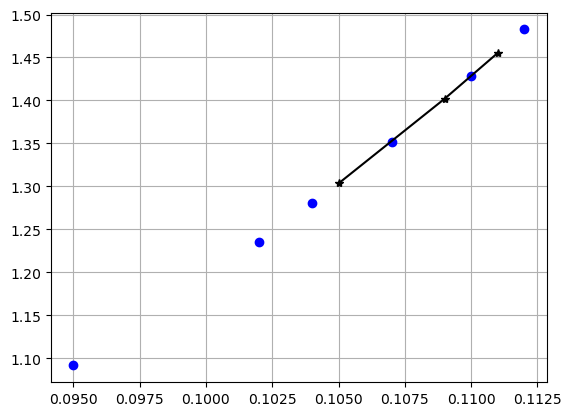

In [9]:
import matplotlib.pyplot as plt
def koef_spline(x,y,n,b,c,d):
    h=[0]*n
    l=[0]*n
    de=[0]*n
    lam=[0]*n
    for i in range(1,n):
        h[i]=x[i]-x[i-1]
        l[i]=(y[i]-y[i-1])/h[i]
    de[1]=-h[2]/(2*(h[1]+h[2]))
    lam[1]=1.5*(l[2]-l[1])/(h[1]+h[2])
    for i in range(3,n):
        de[i-1]=(-h[i])/(2*h[i-1]+2*h[i]+h[i-1]*de[i-2])
        lam[i-1]=(3*l[i]-3*l[i-1]-h[i-1]*lam[i-2])/(2*h[i-1]+2*h[i]+h[i-1]*de[i-2])
    c[n-1]=0
    for i in range(n-1,2,-1):
        c[i-1]=de[i-1]*c[i]+lam[i-1]
    for i in range(1,n):
        d[i]=(c[i]-c[i-1])/(3*h[i])
        b[i]=l[i]+(2*c[i]*h[i]+h[i]*c[i-1])/3
def spline(t,x,y,n):
    a=[0]*n
    b=[0]*n
    c=[0]*n
    d=[0]*n
    koef_spline(x,y,n,b,c,d)
    for i in range(1,n):
        a[i]=y[i]
    if t>=x[n-1]:
        j=n-1
    else:
        for i in range(1,n):
            if t<x[i]:
                j=i
                break
    s=a[j]+b[j]*(t-x[j])+c[j]*(t-x[j])**2+d[j]*(t-x[j])**3
    return s
t=[0.105,0.109,0.111]
x=[0.095,0.102,0.104,0.107,0.110,0.112]
y=[1.09131,1.23490,1.27994,1.35142,1.42815,1.48256]
n=6
y1=[0,0,0]
for i in range(len(t)):
    y1[i]=spline(t[i],x,y,n)
plt.figure()
plt.plot(x,y,'ob')
plt.plot(t,y1,marker='*',color='black')
plt.grid(True)
plt.show()
